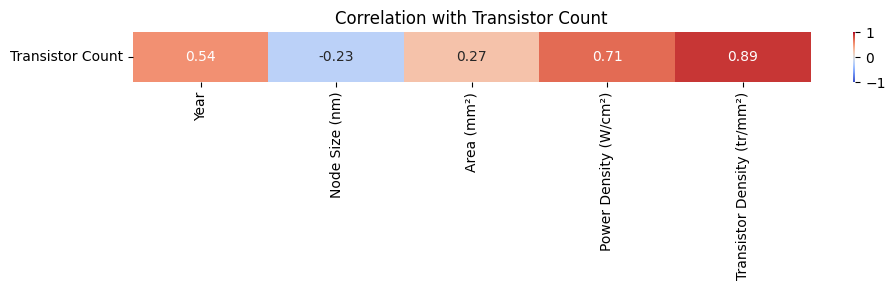

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv(r"D:\dataset\proj_dataset.csv", encoding="latin1")

target = 'Transistor Count'
features = [
    'Year',
    'Node Size (nm)',
    'Area (mm²)',
    'Power Density (W/cm²)',
    'Transistor Density (tr/mm²)'
]

corr_matrix = df[features + [target]].corr()
heatmap_data = corr_matrix.loc[[target], features]

plt.figure(figsize=(10, 3))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Transistor Count')
plt.yticks(rotation=0)
plt.tight_layout()


plt.show()

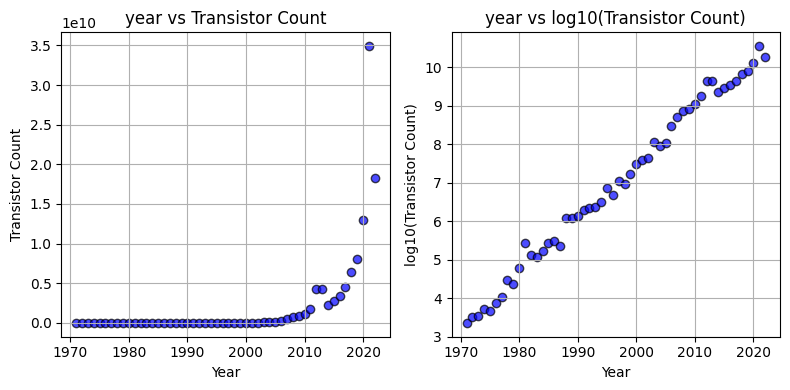

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv(r"D:\dataset\proj_dataset.csv", encoding="latin1")
Y_ = df['Transistor Count']
X_ = df['Year']
Y = np.log10(df['Transistor Count'])
X = df['Year']
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.scatter(X_, Y_, color='blue', edgecolor='k', alpha=0.7)
plt.title('year vs Transistor Count')
plt.xlabel('Year')
plt.ylabel('Transistor Count')
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(X, Y, color='blue', edgecolor='k', alpha=0.7)
plt.title('year vs log10(Transistor Count)')
plt.xlabel('Year')
plt.ylabel('log10(Transistor Count)')
plt.grid(True)
plt.tight_layout()

plt.show()

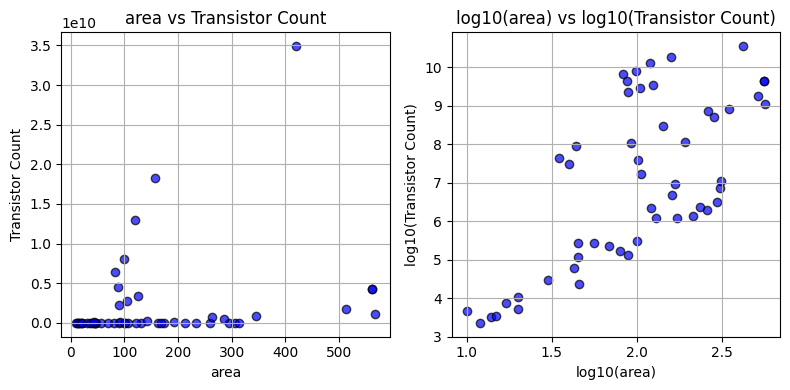

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv(r"D:\dataset\proj_dataset.csv", encoding="latin1")
Y_ = df['Transistor Count']
X_ = df['Area (mm²)']
Y = np.log10(df['Transistor Count'])
X = np.log10(df['Area (mm²)'])
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.scatter(X_, Y_, color='blue', edgecolor='k', alpha=0.7)
plt.title('area vs Transistor Count')
plt.xlabel('area')
plt.ylabel('Transistor Count')
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(X, Y, color='blue', edgecolor='k', alpha=0.7)
plt.title('log10(area) vs log10(Transistor Count)')
plt.xlabel('log10(area)')
plt.ylabel('log10(Transistor Count)')
plt.grid(True)
plt.tight_layout()

plt.show()

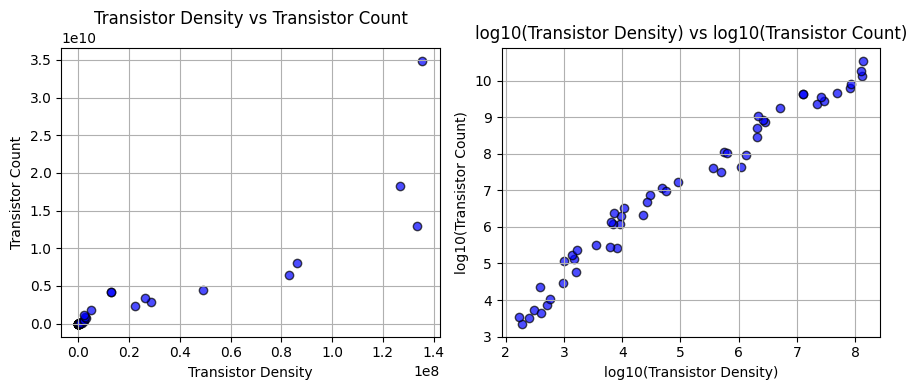

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv(r"D:\dataset\proj_dataset.csv", encoding="latin1")
Y_ = df['Transistor Count']
X_ = df['Transistor Density (tr/mm²)']
Y = np.log10(df['Transistor Count'])
X = np.log10(df['Transistor Density (tr/mm²)'])
plt.figure(figsize=(9, 4))
plt.subplot(1,2,1)
plt.scatter(X_, Y_, color='blue', edgecolor='k', alpha=0.7)
plt.title('Transistor Density vs Transistor Count')
plt.xlabel('Transistor Density')
plt.ylabel('Transistor Count')
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(X, Y, color='blue', edgecolor='k', alpha=0.7)
plt.title('log10(Transistor Density) vs log10(Transistor Count)')
plt.xlabel('log10(Transistor Density)')
plt.ylabel('log10(Transistor Count)')
plt.grid(True)
plt.tight_layout()

plt.show()

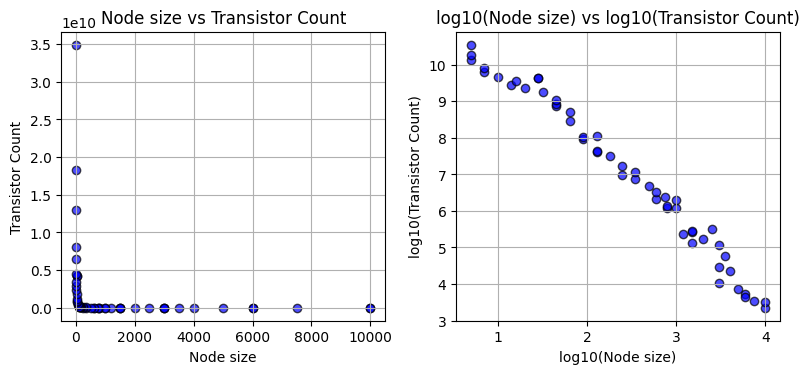

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv(r"D:\dataset\proj_dataset.csv", encoding="latin1")
Y_ = df['Transistor Count']
X_ = df['Node Size (nm)']
Y = np.log10(df['Transistor Count'])
X = np.log10(df['Node Size (nm)'])
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.scatter(X_, Y_, color='blue', edgecolor='k', alpha=0.7)
plt.title('Node size vs Transistor Count')
plt.xlabel('Node size')
plt.ylabel('Transistor Count')
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(X, Y, color='blue', edgecolor='k', alpha=0.7)
plt.title('log10(Node size) vs log10(Transistor Count)')
plt.xlabel('log10(Node size)')
plt.ylabel('log10(Transistor Count)')
plt.grid(True)
plt.tight_layout()

plt.show()

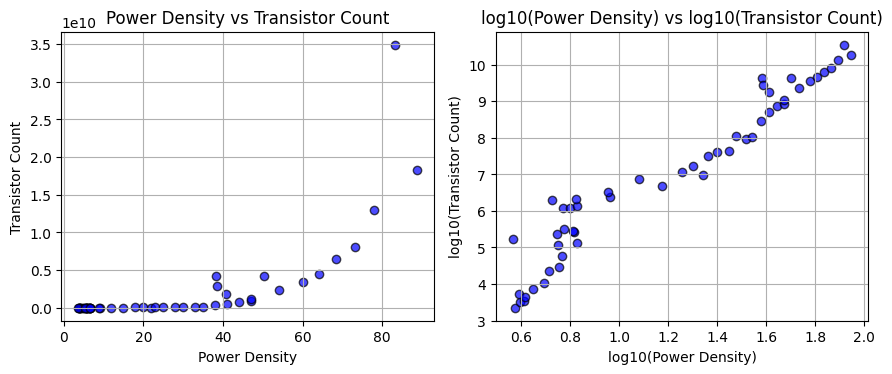

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv(r"D:\dataset\proj_dataset.csv", encoding="latin1")
Y_ = df['Transistor Count']
X_ = df['Power Density (W/cm²)']
Y = np.log10(df['Transistor Count'])
X = np.log10(df['Power Density (W/cm²)'])
plt.figure(figsize=(9, 4))
plt.subplot(1,2,1)
plt.scatter(X_, Y_, color='blue', edgecolor='k', alpha=0.7)
plt.title('Power Density vs Transistor Count')
plt.xlabel('Power Density')
plt.ylabel('Transistor Count')
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(X, Y, color='blue', edgecolor='k', alpha=0.7)
plt.title('log10(Power Density) vs log10(Transistor Count)')
plt.xlabel('log10(Power Density)')
plt.ylabel('log10(Transistor Count)')
plt.grid(True)
plt.tight_layout()

plt.show()

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.read_csv(r"D:\dataset\proj_dataset.csv", encoding="latin1")

df['Log_Area'] = np.log10(df['Area (mm²)'])
df['Log_Density'] = np.log10(df['Transistor Density (tr/mm²)'])
df['Log_Node'] = np.log10(df['Node Size (nm)'])
features = ['Year', 'Log_Node', 'Log_Area', 'Log_Density', 'Power Density (W/cm²)']
x = df[features]
y = np.log10(df["Transistor Count"])

x_train, x_test, y_train_log, y_test_log = train_test_split(
    x, y, test_size=0.2, random_state=42
)

model = LinearRegression()

model.fit(x_train, y_train_log)


y_pred_log = model.predict(x_test)
y_pred = 10**y_pred_log
y_test = 10**y_test_log

r2 = r2_score(y_test, y_pred)

residual = (y_test-y_pred)/y_test
mre = np.mean(abs(residual))
print("R² Score:", r2)
print("Mean Residual Error:", mre)

k = {
    'ACTUAL Y':y_test.astype(int),
    'PREDICTED Y':y_pred.astype(int),
    'RESIDUAL ERROR':residual
}
print(pd.DataFrame(k))


R² Score: 0.9973169994176507
Mean Residual Error: 0.16368360414017566
       ACTUAL Y  PREDICTED Y  RESIDUAL ERROR
19      1325000      1342216       -0.012994
41   4250000000   3859516167        0.091879
47   6441575764   7211609302       -0.119541
12       115425        64816        0.438458
43   2300000000   2157936558        0.061767
5          7500         9853       -0.313786
17      1184999       987918        0.166314
50  34908649574  36363084524       -0.041664
3          5250         6193       -0.179797
32    112000000     96283193        0.140329
13       172078       131813        0.233991
Model saved as 'model_linear.pkl'


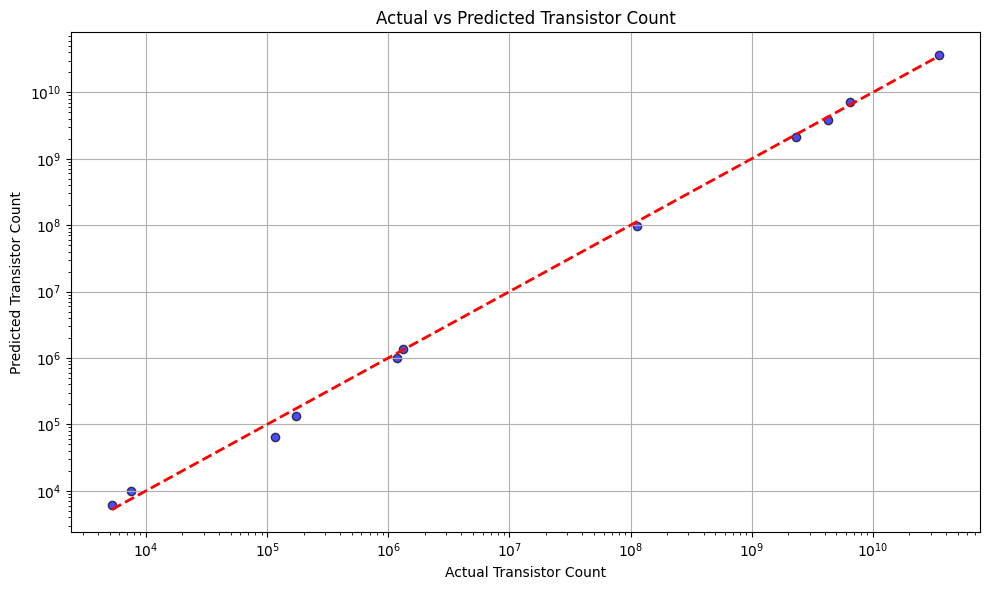

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Plotting Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
# Adding the ideal 1:1 line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Transistor Count')
plt.ylabel('Predicted Transistor Count')
plt.title('Actual vs Predicted Transistor Count')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()

plt.show()

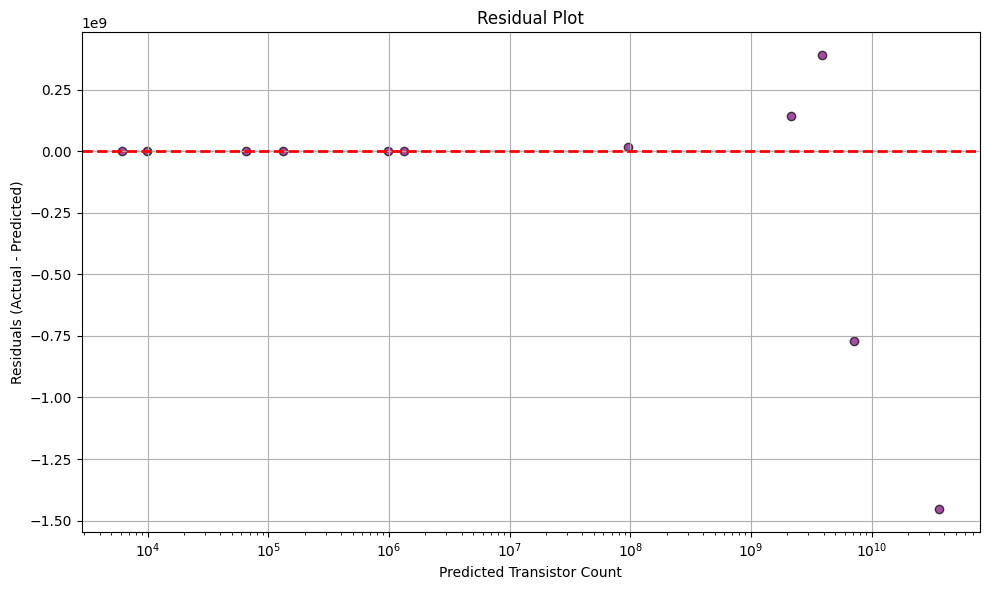

In [42]:
import matplotlib.pyplot as plt

# Calculate standard residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', edgecolor='k', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Transistor Count')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.xscale('log')
plt.grid(True)
plt.tight_layout()

plt.show()